<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 9.1: NN with Keras
INSTRUCTIONS:
- Read the guides and hints, then create the necessary analysis and code to find an answer and conclusion for the task below.
- **NOTE**: This is a Regression problem. Consider the appropriate:
    - Activation function
    - Loss/Cost Function
    - Metrics

### Import libraries

In [2]:
# insert code here

## Import libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

### Load data
Load the Diabetes dataset from **SciKit-Learn**.

In [9]:
# insert code here

df = load_diabetes()

print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

### Prepare input data

In [18]:
# insert code here

X = df.data  #.astype(np.uint8)
n_cols = X.shape[1]

# output
target = df.target  #.astype(np.uint8)

# Convert the target to categorical
#y = to_categorical(
    #target,
    #num_classes = len(set(target)))
    #,dtype = 'uint8')

### Split the data (training/test)

In [19]:
# insert code here

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size = 0.3,
    random_state = 65)

In [21]:
X.shape

(442, 10)

In [22]:
y.shape

(442,)

### Create the model's architecture

In [64]:
# insert code here

model = Sequential()

model.add(Dense(15, activation = 'relu', input_shape = (n_cols, )))
# Add the second hidden layer
model.add(Dense(5, activation = 'relu'))

# Add the output layer
model.add(Dense(1, activation = 'linear'))

In [65]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 15)                165       
_________________________________________________________________
dense_10 (Dense)             (None, 5)                 80        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 6         
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________
None


### Compile the model

In [66]:
# insert code here

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

### Fit the training data

In [67]:
%%time
# insert code here

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.25,
    batch_size = 20,
    epochs = 100,
    verbose = 1)

Epoch 1/100
12/12 [==============================] - 1s 36ms/step - loss: 1.7691e-05 - accuracy: 0.0000e+00 - val_loss: 1.8786e-05 - val_accuracy: 0.0000e+00
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 1.7691e-05 - accuracy: 0.0000e+00 - val_loss: 1.8786e-05 - val_accuracy: 0.0000e+00
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 1.7691e-05 - accuracy: 0.0000e+00 - val_loss: 1.8786e-05 - val_accuracy: 0.0000e+00
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 1.7691e-05 - accuracy: 0.0000e+00 - val_loss: 1.8786e-05 - val_accuracy: 0.0000e+00
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 1.7691e-05 - accuracy: 0.0000e+00 - val_loss: 1.8786e-05 - val_accuracy: 0.0000e+00
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 1.7691e-05 - accuracy: 0.0000e+00 - val_loss: 1.8786e-05 - val_accuracy: 0.0000e+00
Epoch 7/100
12/12 [==============================] - 0s 3

### Create predictions

In [68]:
# insert code here

predictions = np.argmax(model.predict(X_test),axis=1)

### Evaluate the model

In [69]:
# insert code here

#score = model.evaluate(X_test, y_test)
#print('\nTest loss: %.6f, Test accuracy: %.6f' % tuple(score[0]))

In [70]:
score = model.evaluate(X_test, y_test)
print('\nTest loss: %.6f' % score[0])

5/5 [==============================] - 0s 1ms/step - loss: 1.8526e-05 - accuracy: 0.0000e+00

Test loss: 0.000019


In [71]:
# Find RMSE
score[0] ** (1/2)

0.004304166006021242

In [72]:
y.mean()

152.13348416289594

In [73]:
y.std()

77.00574586945044

In [74]:
y.min()

25.0

In [75]:
y.max()

346.0

In [76]:
history.history

{'loss': [1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.769148548191879e-05,
  1.7691485481918

### Visualisation of cost

NameError: name 'history' is not defined

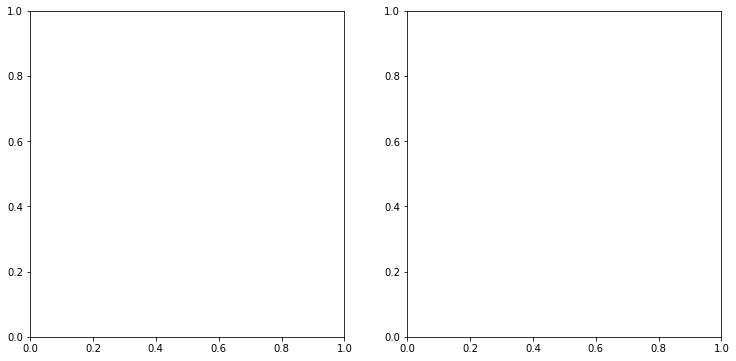

In [3]:
# insert code here


fig, ax = plt.subplots(1, 2, figsize = (10, 6))
fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

plt.rcParams.update({'font.size': 18})

# Plot training & validation accuracy values
ax[0].plot(history.history['accuracy'], label = 'Training')
ax[0].plot(history.history['val_accuracy'], label = 'Validation')
ax[0].set_title('Model accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend()

# Plot training & validation loss values
ax[1].plot(history.history['loss'], label = 'Training')
ax[1].plot(history.history['val_loss'], label = 'Validation')
ax[1].set_title('Model loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend()

plt.show()

### Visualisation of residuals

In [79]:
# insert code here
from sklearn.metrics import r2_score
# Calculate R2 and adjusted R2
r2 = r2_score(y_test, predictions)
n, p = X.shape # sample size, number of explanatory variables
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

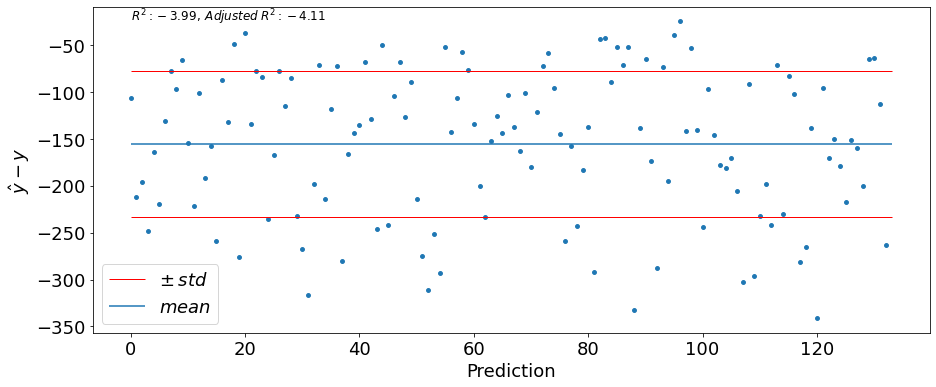

In [80]:
difference = predictions.flatten() - y_test
d_mean = difference.mean()
d_std = difference.std()
n_pred = len(predictions)
plt.figure(figsize = (15, 6))
plt.scatter(range(n_pred), difference, s = 15)
plt.hlines(d_mean + d_std, 0, n_pred, 'r', lw = 1, label = '$\pm \: std$')
plt.hlines(d_mean, 0, n_pred, label = '$mean$')
plt.hlines(d_mean - d_std, 0, n_pred, 'r', lw = 1)
plt.xlabel('Prediction')
plt.ylabel('$\hat y - y$')
plt.legend()
plt.text(0, difference.max() * 0.95,
         '$R^2: %.2f, \: Adjusted \: R^2: %.2f$' % (r2, adjusted_r2),
         fontsize = 12)
plt.show()



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



